In [1]:
#import dependency
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import requests
import psycopg2
import config as creds


In [2]:
# Import our input dataset
ames_df = pd.read_csv('Resources/ames_raw.csv')
ames_df.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
ames_df

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [6]:
# Drop 1st column
ames_df = ames_df.drop(ames_df.columns[0], axis=1)

# **Step 1: Data Exploration**
* Check the dataset
* check the missing values and duplicates
* check the columns
* check the types
* check the shape

In [7]:
ames_df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [10]:
# Rename Columns
ames_df.columns = ['order','pid','mssubclass','mszoning','lotfrontage','lotarea','street','alley','lotshape','landcontour', \
                   'utilities','lotconfig','landslope','neighborhood','condition1','condition2','bldgtype','housestyle',\
                   'overallqual','overallcond','yearbuilt','yearremod/add','roofstyle','roofmatl','exterior1st','exterior2nd',\
                   'masvnrtype','masvnrarea','exterqual','extercond','foundation','bsmtqual','bsmtcond','bsmtexposure',\
                   'bsmtfintype1','bsmtfinsf1','bsmtfintype2','bsmtfinsf2','bsmtunfsf','totalbsmtsf','heating','heatingqc',\
                   'centralair','electrical','1stflrsf','2ndflrsf','lowqualfinsf','grlivarea','bsmtfullbath','bsmthalfbath',\
                   'fullbath','halfbath','bedroomabvgr','kitchenabvgr','kitchenqual','totrmsabvgrd','functional','fireplaces',\
                   'fireplacequ','garagetype','garageyrblt','garagefinish','garagecars','garagearea','garagequal','garagecond',\
                   'paveddrive','wooddecksf','openporchsf','enclosedporch','3ssnporch','screenporch','poolarea','poolqc','fence',\
                   'miscfeature','miscval','mosold','yrsold','saletype','salecondition','saleprice']
ames_df.head(5)

,order,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**Data Explorarion Summary:**
* There are multiple types of features, both categorical and numerical
* Tratget is numerical
* There are missing values in the dataset



# **Step 2: Feature Selection:**
* Use heatmap to identify features that are most correlated to the Sales Price


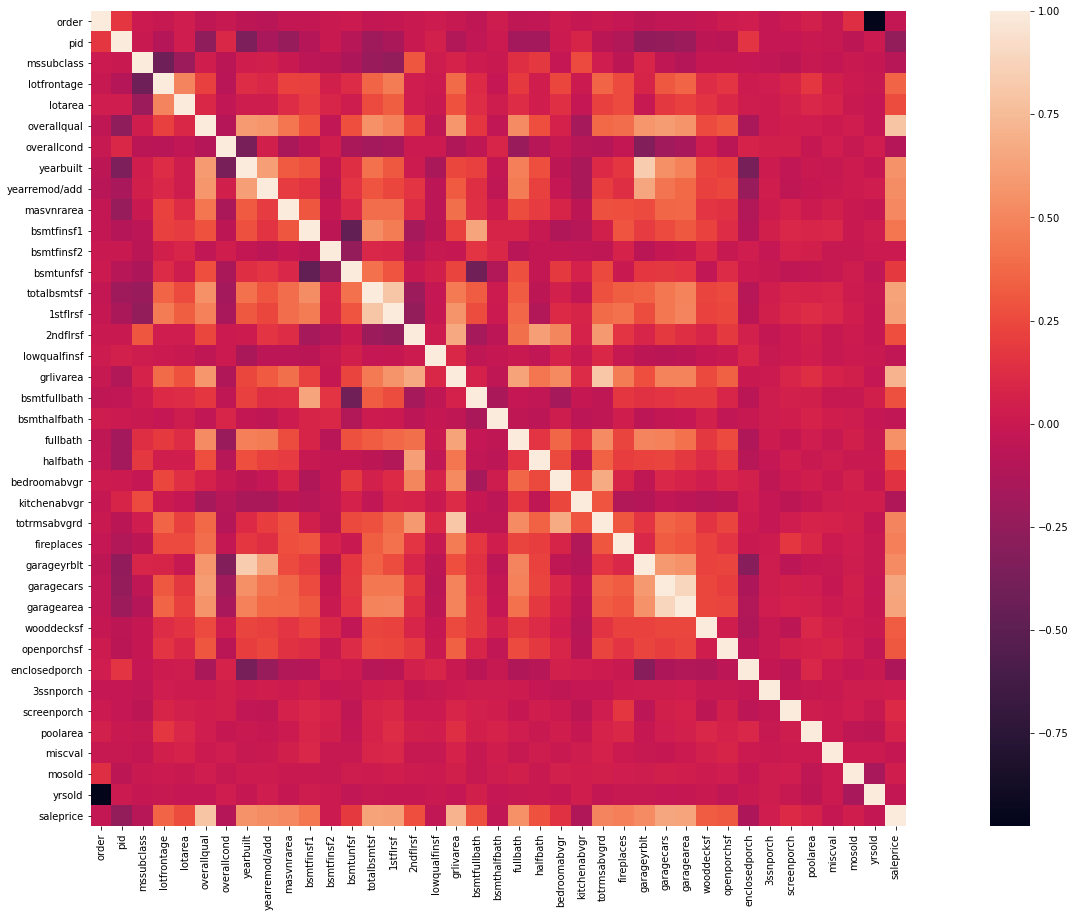

In [11]:
corrmat = ames_df.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrmat, vmax=1, square=True)


In [12]:
corrmat_2 = corrmat['saleprice'].sort_values(ascending=False).head(12).to_frame()

cm = sns.light_palette("purple", as_cmap=True)

corrmat_3 = corrmat_2.style.background_gradient(cmap=cm)
corrmat_3


,saleprice
saleprice,1.000000
overallqual,0.799262
grlivarea,0.706780
garagecars,0.647877
garagearea,0.640401
totalbsmtsf,0.632280
1stflrsf,0.621676
yearbuilt,0.558426
fullbath,0.545604
yearremod/add,0.532974


# **Initial Features Selection**
we selected 15 features.

***NUmerical Category:***
Based on heatmap, pick the top 11 features that are most correlated to sales price(vmax>0.5)

* overallqual_id
* grlivarea	
* garagecars
* garagearea
* totalbsmtsf	
* 1stflrsf
* fullbath	
* totrmsabvgrd
* yearbuilt	
* yearremodadd

***Categorical Category:***
Categorical object can not be compared using heatmap so we selected a few more features based on commonsense
* LotConfig
* Neighborhood
* BldgType
* Foundation
Noted: we will try different combination to determine the final features selected in machine learning step


# **Step 3: Data cleaning:**

* remove null value or replace it with the mode of their respective columns
* remove duplicate if any
* create new feature to combine features that are in the same category


In [14]:
# Check df shape and columns
print(ames_df.shape[0])
print(ames_df.columns)

2930
Index(['order', 'pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremod/add', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garageco

In [24]:
#check missing data ratio
missing_2 = (ames_df.isnull().sum()/ len(ames_df)) * 100
missing_2 = missing_2.drop(missing_2[missing_2 ==0].index).sort_values(ascending=False)[:30]
missing_2

poolqc          99.556314
miscfeature     96.382253
alley           93.242321
fence           80.477816
fireplacequ     48.532423
garagecond       5.426621
garagequal       5.426621
garagefinish     5.426621
garagetype       5.358362
bsmtexposure     2.832765
bsmtfintype2     2.764505
bsmtfintype1     2.730375
bsmtcond         2.730375
bsmtqual         2.730375
lotfrontage      0.102389
dtype: float64

**remove/replace NA**


In [16]:
#Replace null values with o for garageyrblt, garagearea and garagecars with 0
for col in ('garageyrblt', 'garagearea', 'garagecars'):
  ames_df[col] = ames_df[col].fillna(0)

In [18]:
#Fill missing values in masvnrarea and masvnrtype with mode
ames_df['masvnrarea'].value_counts()
ames_df['masvnrarea'] = ames_df['masvnrarea'].fillna(ames_df['masvnrarea'].mode()[0])
ames_df['masvnrtype'].value_counts()
ames_df['masvnrtype'] = ames_df['masvnrtype'].fillna(ames_df['masvnrtype'].mode()[0])

In [19]:
ames_df['bsmthalfbath'].value_counts()
ames_df['bsmthalfbath'] = ames_df['bsmthalfbath'].fillna(ames_df['bsmthalfbath'].mode()[0])
ames_df['bsmtfullbath'].value_counts()
ames_df['bsmtfullbath'] = ames_df['bsmtfullbath'].fillna(ames_df['bsmtfullbath'].mode()[0])

In [20]:
# null values saleprice are due to missing saleprice column in the test dataset
# we will replace missing values in lotfrontage with median lotfrontage of neighberhood 
ames_df['lotfrontage'] = ames_df.groupby('neighborhood')['lotfrontage'].transform(
      lambda x: x.fillna(x.median()))

In [ ]:
df["utilities"].value_counts()
# drop the entire column since it only doesn't help with prediction
ames_df = ames_df.drop(['utilities'], axis=1)

In [21]:
ames_df["electrical"].value_counts()
ames_df["electrical"] = ames_df["electrical"].fillna(ames_df["electrical"].mode()[0])

In [22]:
basement = ["totalbsmtsf", "bsmtunfsf", "bsmtfinsf2", "bsmtfinsf1"]
for i in basement:
  print(ames_df[i].value_counts())
  ames_df[i] = ames_df[i].fillna(ames_df[i].mode()[0])

0.0       79
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
811.0      1
1958.0     1
1615.0     1
1765.0     1
1967.0     1
Name: totalbsmtsf, Length: 1058, dtype: int64
0.0       244
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
1380.0      1
439.0       1
227.0       1
303.0       1
1851.0      1
Name: bsmtunfsf, Length: 1137, dtype: int64
0.0      2578
294.0       5
180.0       5
72.0        3
435.0       3
         ... 
35.0        1
154.0       1
106.0       1
488.0       1
530.0       1
Name: bsmtfinsf2, Length: 274, dtype: int64
0.0       930
24.0       27
16.0       14
300.0       9
288.0       8
         ... 
914.0       1
1836.0      1
874.0       1
337.0       1
696.0       1
Name: bsmtfinsf1, Length: 995, dtype: int64


In [23]:
#Check if there is any duplicates
ames_df.duplicated().sum()

0

In [ ]:
# combine an important feature - total_area
df['total_area'] = df['totalbsmtsf'] + df['1stflrsf'] + df['2ndflrsf'] + df['grlivarea'] + df['garagearea']


In [ ]:
#check if the new column was addedd
df

In [ ]:
numerical = df.select_dtypes(exclude='object')
numerical.columns

In [ ]:
categorical = df.select_dtypes('object')
categorical.columns

In [ ]:
x_features = ["lotconfig", "neighborhood", "bldgtype", "foundation","total_area","overallqual","grlivarea", "garagecars","garagearea","totalbsmtsf","1stflrsf","fullbath","totrmsabvgrd", "yearbuilt","yearremodadd"]
for x in x_features:

  plt.scatter(df[x], df['saleprice'])
  plt.xlabel(x)
  plt.ylabel('selaprice')
  plt.show()

In [ ]:
#dropping any NA before putting the dataset into our model
df = df.dropna()
df.isnull().sum()

Export cleaned dataset

In [ ]:
df.to_csv('cleaned_dataset', index=False)

In [ ]:
def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                 +" password="+ creds.PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    #print("Connected!")

    #Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor


In [ ]:
# Connecting to DB

conn, cursor = connect()

# SQL command to create inventory table
sql = "select * from ames;"
#cursor.execute(sql)
df = pd.read_sql_query(sql, conn)
#conn.commit()
# dat = pd.read_sql_query(sql, conn)